<a href="https://colab.research.google.com/github/jan3011/Prediction-of-Parkinson-disease/blob/master/Decision_Tree_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving demographics.csv to demographics.csv


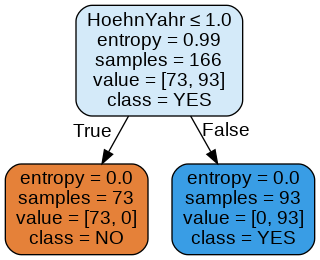

In [1]:
import pandas as pd
from io import StringIO
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from google.colab import files
df=files.upload()
df= pd.read_csv('demographics.csv')
df=df[['Gender','Age','Height (meters)','Weight (kg)','HoehnYahr','UPDRS','UPDRSM','TUAG','Speed_01 (m/sec)','Speed_10','Target']]
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df['HoehnYahr'].fillna(df.groupby('Target')['HoehnYahr'].transform("median"),inplace=True)
df['UPDRS'].fillna(df.groupby('Target')['UPDRS'].transform("median"),inplace=True)
df['Speed_10'].fillna(df.groupby('Target')['Speed_10'].transform("median"),inplace=True)
df['Height (meters)'].fillna(df.groupby('Target')['Height (meters)'].transform("median"),inplace=True)
df['Weight (kg)'].fillna(df.groupby('Target')['Weight (kg)'].transform("median"),inplace=True)
df['UPDRSM'].fillna(df.groupby('Target')['UPDRSM'].transform("median"),inplace=True)
df['TUAG'].fillna(df.groupby('Target')['TUAG'].transform("median"),inplace=True)
df['Speed_01 (m/sec)'].fillna(df.groupby('Target')['Speed_01 (m/sec)'].transform("median"),inplace=True)
feature_cols = ['Gender','Age','Height (meters)','Weight (kg)','HoehnYahr','UPDRS','UPDRSM','TUAG','Speed_01 (m/sec)','Speed_10']
X = df[feature_cols]
y = df.Target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(criterion="entropy",splitter="best",min_samples_split=10,max_depth = 3)
clf = clf.fit(X,y)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['NO','YES'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Parkinson.png')
Image(graph.create_png())